## Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection and Processing

In [ ]:
# loading the data
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.shape

(301, 9)

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [ ]:
df.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [ ]:
df.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

## Encoding the categorical data

In [ ]:
# encoding the Fuel_Type data

df.replace({'Fuel_Type':{'Petrol': 0, 'Diesel' : 1, 'CNG' : 2}}, inplace=True)

# encoding the Seller_Type data

df.replace({'Seller_Type':{'Dealer': 0, 'Individual' : 1}}, inplace=True)

# encoding the Transmission data

df.replace({'Transmission':{'Manual': 0, 'Automatic' : 1}}, inplace=True)


In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


## Spliting the data into train and test data

In [ ]:
X = df.drop(['Car_Name', 'Selling_Price'], axis=1)
y = df.Selling_Price

In [ ]:
print(X[:5])

   Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0  2014           5.59       27000          0            0             0   
1  2013           9.54       43000          1            0             0   
2  2017           9.85        6900          0            0             0   
3  2011           4.15        5200          0            0             0   
4  2014           6.87       42450          1            0             0   

   Owner  
0      0  
1      0  
2      0  
3      0  
4      0  


In [ ]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
184  2008          0.750       26000          0            1             0   
132  2017          0.950        3500          0            1             0   
194  2008          0.787       50000          0            1             0   
75   2015          6.800       36000          0            0             0   
111  2016          1.500        8700          0            1             0   
..    ...            ...         ...        ...          ...           ...   
188  2013          0.570       18000          0            1             0   
71   2011         12.480       45000          1            0             0   
106  2014          3.450       16500          0            1             0   
270  2011         10.000       69341          0            0             0   
102  2017          1.780        4000          0            1             0   

     Owner  
184      1  
132      0  
194      0  
75       0 

## Model training

1. Linear Model

In [ ]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, y_train)

LinearRegression()

Model Evalution

In [ ]:
training_data_predict = regressor.predict(X_train)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print(f'training data r2 score {r2_score(y_train, training_data_predict)}')

training data r2 score 0.883979349675079


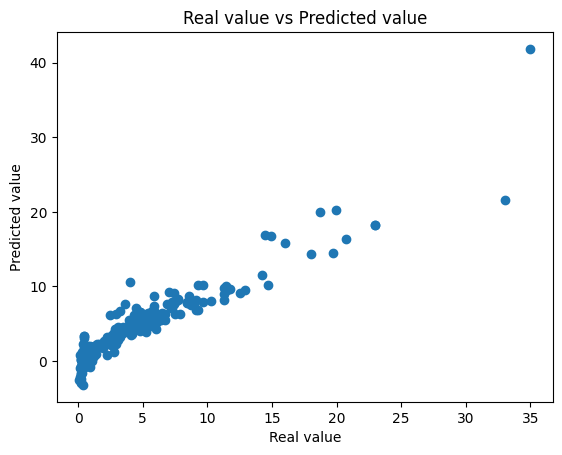

In [ ]:
plt.scatter(x=y_train, y=training_data_predict)
plt.xlabel('Real value')
plt.ylabel('Predicted value')
plt.title('Real value vs Predicted value')
plt.show()

In [ ]:
test_data_predict = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print(f'training data r2 score {r2_score(y_test, test_data_predict)}')

training data r2 score 0.8468053957655798


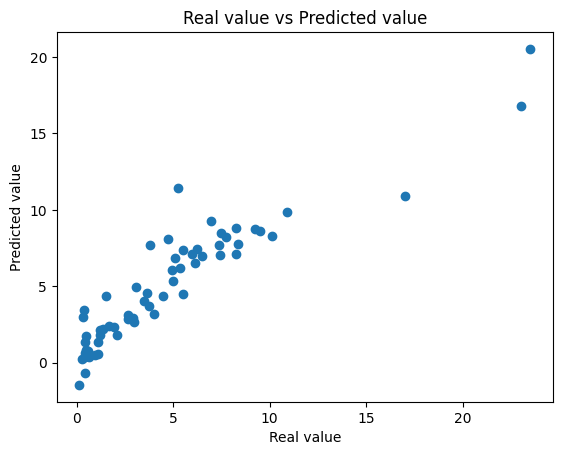

In [ ]:
plt.scatter(x=y_test, y=test_data_predict)
plt.xlabel('Real value')
plt.ylabel('Predicted value')
plt.title('Real value vs Predicted value')
plt.show()

2. Lasso regression

In [ ]:
from sklearn.linear_model import Lasso 
regressor = Lasso()

In [ ]:
regressor.fit(X_train, y_train)

Lasso()

Model Evalution

In [ ]:
training_data_predict = regressor.predict(X_train)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print(f'training data r2 score {r2_score(y_train, training_data_predict)}')

training data r2 score 0.848030286813716


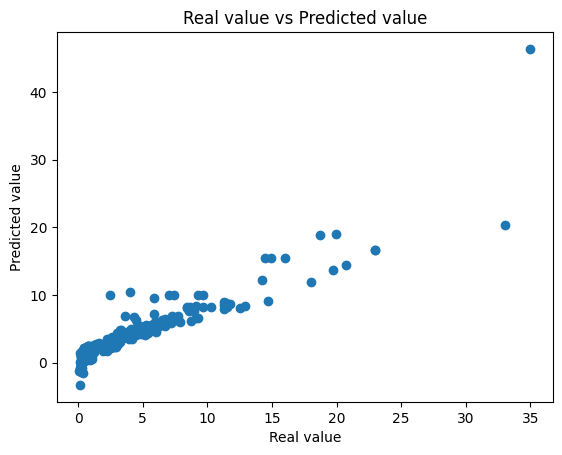

In [ ]:
plt.scatter(x=y_train, y=training_data_predict)
plt.xlabel('Real value')
plt.ylabel('Predicted value')
plt.title('Real value vs Predicted value')
plt.show()

In [ ]:
test_data_predict = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print(f'training data r2 score {r2_score(y_test, test_data_predict)}')

training data r2 score 0.798551246128469


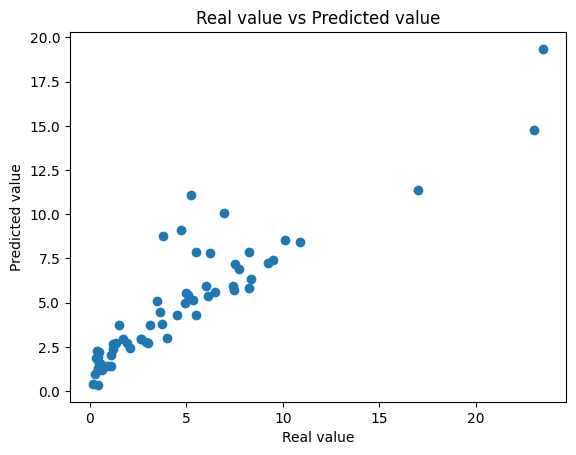

In [ ]:
plt.scatter(x=y_test, y=test_data_predict)
plt.xlabel('Real value')
plt.ylabel('Predicted value')
plt.title('Real value vs Predicted value')
plt.show()